In [ ]:
import pandas as pd
import numpy as np

# import data

## read data

In [ ]:
url_cus = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Customer.csv"
url_pro = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Product.csv"
url_stro = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Store.csv"
url_tra = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Transaction.csv"

In [ ]:
df_c = pd.read_csv(url_cus, sep= ';')
df_c.head(3)

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"


In [ ]:
df_p = pd.read_csv(url_pro, sep= ';')
df_p.head(3)

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500


In [ ]:
df_s = pd.read_csv(url_stro, sep= ';')
df_s.head(3)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"


In [ ]:
df_t = pd.read_csv(url_tra, sep= ';')
df_t.head(3)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4


## merge data

In [ ]:
df1 = pd.merge(df_t, df_c, on='CustomerID', how='inner')
df2 = pd.merge(df1, df_s, on = 'StoreID', how = 'inner')
df = pd.merge(df2, df_p, on = 'ProductID', how = 'inner')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

In [ ]:
df.to_csv("data_kablbe.csv",index=False)

#Data cleansing

## merubah tipe data

In [ ]:
# Ubah tipe data kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
# Ubah tipe data kolom 'Income' menjadi integer
#df['Income'] = df['Income'].astype(int)
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


#Membuat data baru untuk regression

In [ ]:
# Groupby 'Date' dan lakukan aggregasi sum pada kolom 'Qty'
df_grouped = df.groupby('Date').agg({'Qty':'sum'})
df_grouped

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Qty     365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


#time series analysis

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from matplotlib import pyplot

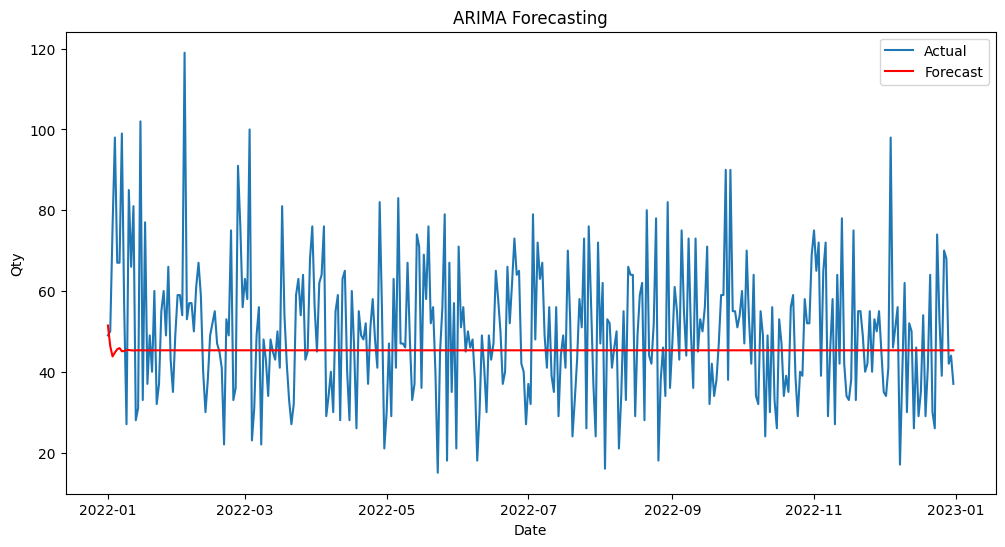

In [ ]:
model = ARIMA(df_grouped['Qty'], order=(4,1,0))  # Sesuaikan parameter order dengan data Anda
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(df_grouped))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['Qty'], label='Actual')
plt.plot(df_grouped.index, predictions, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

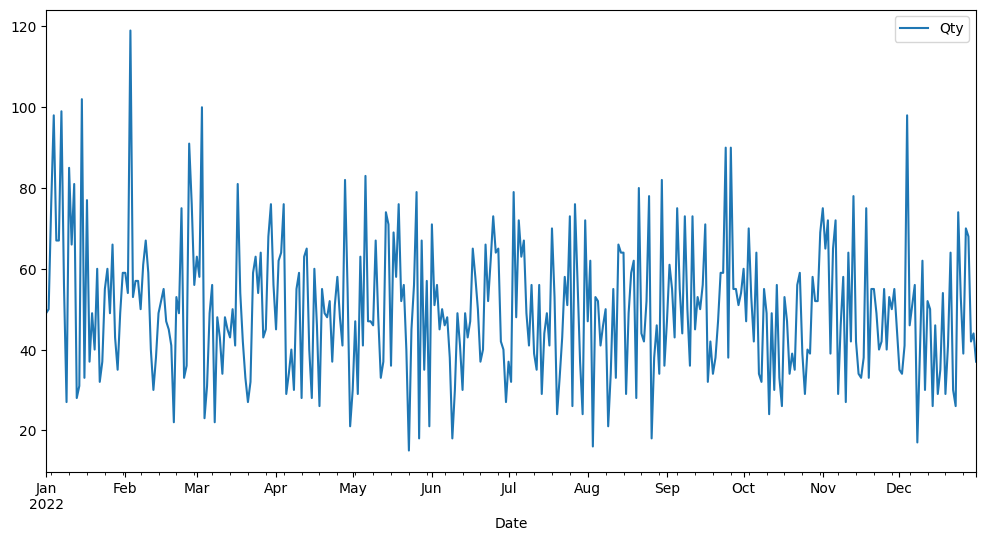

In [ ]:
df_grouped.plot(figsize=(12,6))

In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Qty     365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [ ]:
# split data
# Menghitung jumlah baris untuk data latihan dan data uji
total_rows = df_grouped.shape[0]
train_rows = int(0.8 * total_rows)

# Membagi data menjadi data latihan dan data uji
train_data = df_grouped.iloc[:-31]
test_data = df_grouped.iloc[-31:]

# Menampilkan informasi tentang data latihan dan data uji
print("Jumlah data train:", train_data.shape[0])
print("Jumlah data test:", test_data.shape[0])

Jumlah data train: 334
Jumlah data test: 31


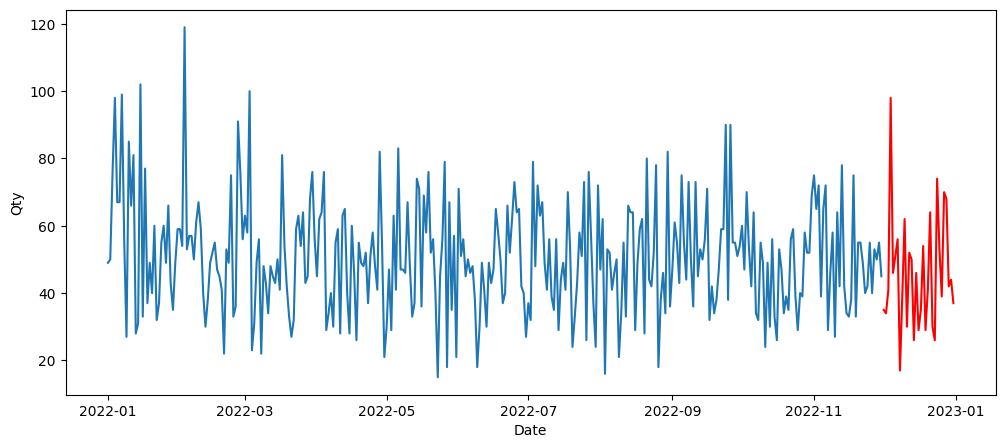

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'], color ="red")
plt.show()

In [ ]:
#stasionery cek
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Uji ADF untuk Stationary Check
result = adfuller(df_grouped['Qty'])
print("Hasil Uji ADF untuk Data:")
print("ADF Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])

Hasil Uji ADF untuk Data:
ADF Statistic: -19.018782802299725
P-value: 0.0
Critical Values: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


Interpretasi hasil ini:

~ADF Statistic: Nilai ADF Statistic yang sangat negatif
menunjukkan bahwa data latihan cenderung stasioner.

~P-value: Nilai p-value sangat kecil 0.0, yang menunjukkan bahwa bahwa data memiliki akar unit non-stasioner. Semakin kecil nilai p-value, semakin kuat bukti bahwa data adalah stasioner.

~Critical Values:   Dalam kasus ini, karena ADF Statistic lebih kecil dari semua critical values, hal ini menunjukkan bahwa kita dapat menolak hipotesis nol dan data adalah stasioner.

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima


In [ ]:
model = auto_arima(train_data['Qty'], start_p=1, start_q=1,
                      test='adf',
                      max_p=70, max_q=70,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3051.924, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2945.934, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3049.924, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2905.900, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2879.552, Time=0.48 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2876.251, Time=0.63 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2872.787, Time=0.53 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=2870.217, Time=1.34 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=2862.129, Time=1.90 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=2860.591, Time=2.02 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=2861.856, Time=1.70 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, T

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -1408.948
Date:                Wed, 23 Aug 2023   AIC                           2831.896
Time:                        01:07:27   BIC                           2858.553
Sample:                    01-01-2022   HQIC                          2842.525
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0065      0.054     -0.120      0.904      -0.113       0.100
ar.L2          0.0485      0.057      0.850      0.396      -0.063       0.160
ar.L3          0.0513      0.058      0.878      0.3

In [ ]:
test_data.shape[0]

31

In [ ]:
prediction  = model.predict(n_periods=test_data.shape[0])
print(prediction)

2022-12-01    50.707329
2022-12-02    49.663239
2022-12-03    49.957745
2022-12-04    49.191338
2022-12-05    50.027704
2022-12-06    49.680245
2022-12-07    49.750549
2022-12-08    49.702678
2022-12-09    49.787197
2022-12-10    49.725498
2022-12-11    49.747559
2022-12-12    49.742020
2022-12-13    49.748701
2022-12-14    49.741086
2022-12-15    49.745496
2022-12-16    49.744084
2022-12-17    49.744680
2022-12-18    49.743948
2022-12-19    49.744577
2022-12-20    49.744273
2022-12-21    49.744374
2022-12-22    49.744307
2022-12-23    49.744378
2022-12-24    49.744329
2022-12-25    49.744350
2022-12-26    49.744341
2022-12-27    49.744348
2022-12-28    49.744342
2022-12-29    49.744346
2022-12-30    49.744344
2022-12-31    49.744345
Freq: D, dtype: float64


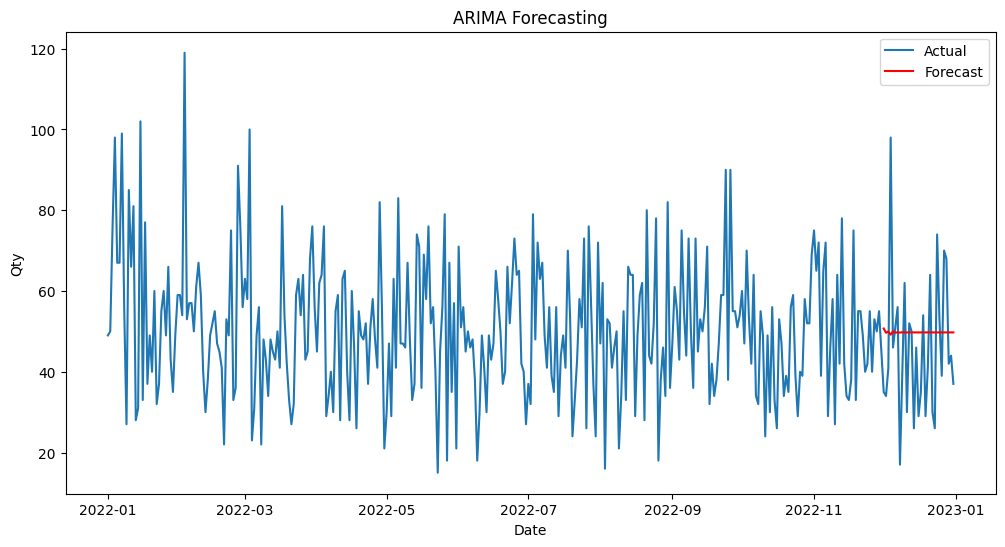

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['Qty'], label='Actual')
plt.plot(prediction.index, prediction, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

In [ ]:
# manual

In [ ]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

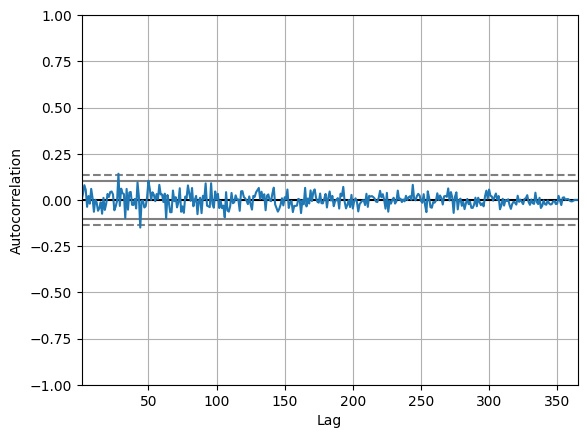

In [ ]:
# karena data stasionary maka d=0
# mencari p dan q
pd.plotting.autocorrelation_plot(df_grouped['Qty'])

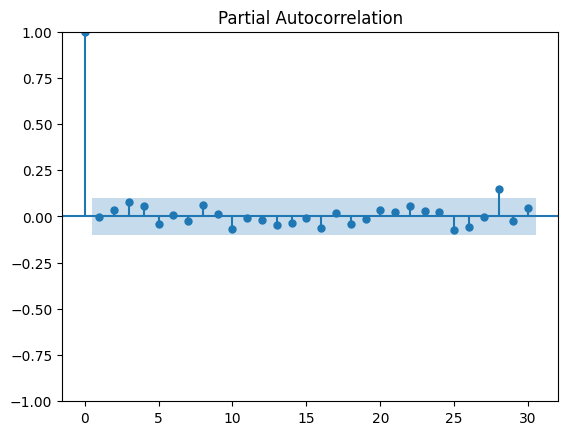

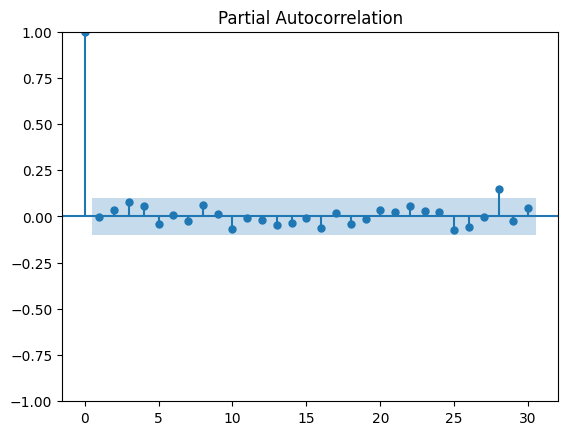

In [ ]:
plot_pacf(df_grouped['Qty'], lags= 30)

In [ ]:
d=0 #karena stasionary
p=5 #karena memotong 5 garis
q=2 # 2 titik terjauh

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

model_arima = ARIMA(train_data['Qty'], order=(p,d,q))
model_arima.fit()

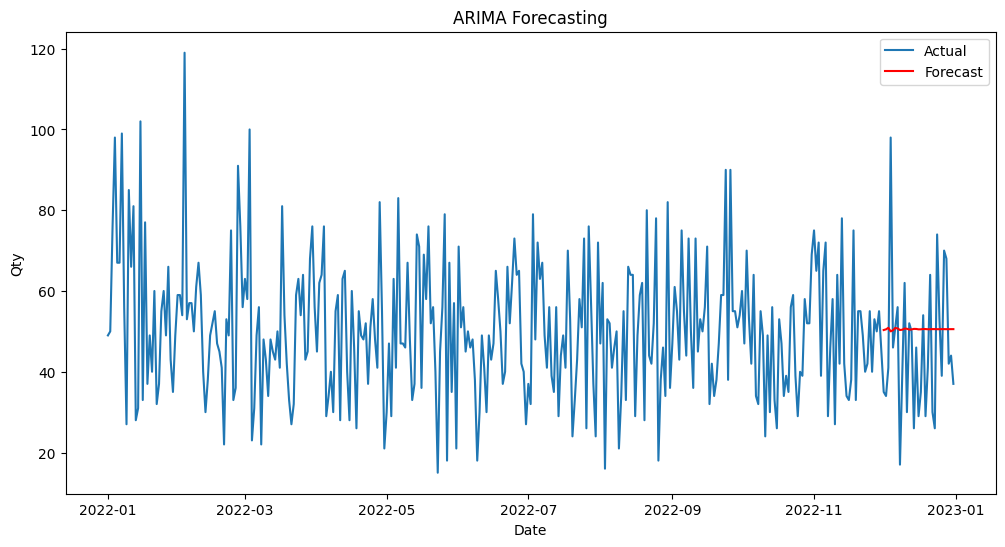

In [ ]:
model = ARIMA(train_data['Qty'], order=(4,0,2))  # Sesuaikan parameter order dengan data Anda
model_fit1 = model.fit()

# Make predictions
predictions1 = model_fit1.forecast(steps=len(test_data))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['Qty'], label='Actual')
plt.plot(predictions1.index, predictions1, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

In [ ]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1416.378
Date:                Wed, 23 Aug 2023   AIC                           2838.756
Time:                        01:08:15   BIC                           2850.189
Sample:                    01-01-2022   HQIC                          2843.314
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.15e-05   2.41e+04      0.000       1.000       1.000
ma.L1         -0.9835      0.014    -70.354      0.000      -1.011      -0.956
sigma2       277.6574     21.456     12.941      0.0

In [ ]:
forecast_auto = auto_arima.predict(len(test_data))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Manual parameter tuning
def tune(z,y,x):
    model1 = ARIMA(train_data, order=(x,y,z))
    model_fit = model1.fit()
    forecast_test = model_fit.forecast(len(test_data))
    df_plot = df_grouped.iloc[-100:]

    #df_plot['forecast'] = [None]*(len(df_plot)-len(forecast_test)) + list(forecast_test)

    mae = mean_absolute_error(test_data, forecast_test)
    mape = mean_absolute_percentage_error(test_data, forecast_test)
    rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

    return mae,mape,rmse

#Parameter combinations
pval = [50,60,70]
dval = [2]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])

tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(3)

,param,mae,mape,rsme
2,"(70, 2, 1)",15.045552,0.349530,18.992447
0,"(50, 2, 1)",15.423963,0.413216,20.005044
1,"(60, 2, 1)",16.176883,0.386983,19.952589


In [ ]:
#Manual parameter tuning
model_manual = ARIMA(train_data, order=(70, 2, 1))
model_fit0 = model_manual.fit()

In [ ]:
forecast = model_fit.forecast(len(test_data))

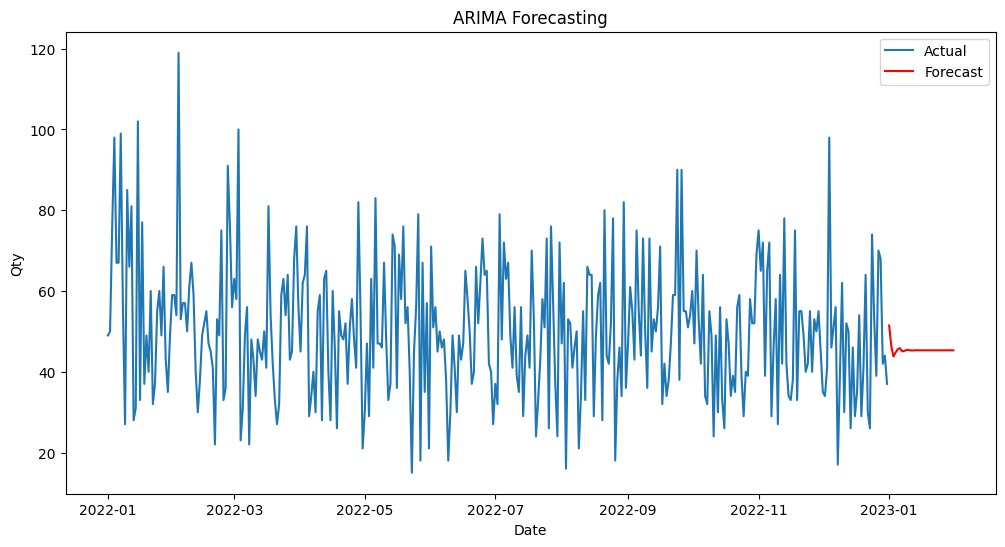

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['Qty'], label='Actual')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

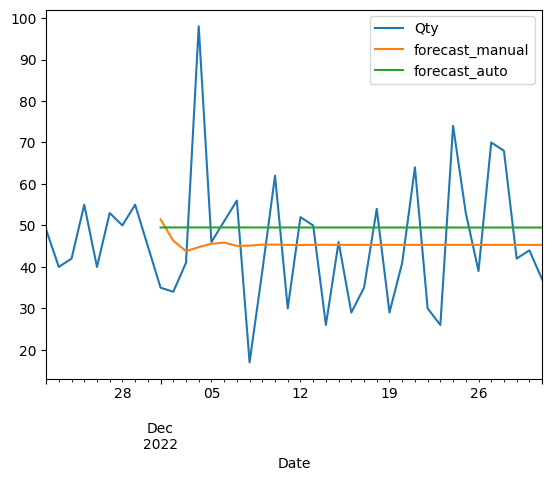

In [ ]:
import matplotlib.pyplot as plt

# Plot forecasting
forecast_manual = model_fit.forecast(steps=len(test_data))
forecast_auto = auto_arima.predict(n_periods=len(test_data))

df_plot = df_grouped.copy()  # Create a copy of the data
df_plot = df_plot.iloc[-40:]
# Add forecasted values to the DataFrame
df_plot['forecast_manual'] = [None] * (len(df_plot) - len(forecast_manual)) + list(forecast_manual)
df_plot['forecast_auto'] = [None] * (len(df_plot) - len(forecast_auto)) + list(forecast_auto)

# Convert forecasted columns to numeric (replace None with NaN)
df_plot['forecast_manual'] = pd.to_numeric(df_plot['forecast_manual'], errors='coerce')
df_plot['forecast_auto'] = pd.to_numeric(df_plot['forecast_auto'], errors='coerce')

# Plot numeric columns
numeric_columns = ['Qty', 'forecast_manual', 'forecast_auto']
df_plot[numeric_columns].plot()
plt.show()


In [ ]:
df_plot.describe()

,Qty,forecast_manual,forecast_auto
count,40.000000,31.000000,31.000000
mean,46.175000,45.492021,49.503215
std,15.281776,1.166170,0.006355
min,17.000000,43.790246,49.492732
25%,36.500000,45.310685,49.497973
50%,44.500000,45.311778,49.503215
75%,53.250000,45.315380,49.508457
max,98.000000,51.451485,49.513700
